In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Here I aim to take count of the sizes of cars

In [5]:
class Car:
    def __init__(self, car_id, position, speed, max_speed, length, width):
        self.car_id=car_id
        self.position=position
        self.speed=speed
        self.max_speed=max_speed
        self.length=length
        self.width=width #Trying to incorporate width???

    def accelerate(self):
        if self.speed<self.max_speed:
            self.speed+=1

    def decelerate(self, headway_distance):
        if self.speed>headway_distance:
            self.speed=headway_distance # reduce speed equivalent only to headway distance

    def random_brake(self, randomization):
        if np.random.random()<randomization and self.speed>0:
            self.speed-=1

In [11]:
class Road:
    def __init__(self, length, max_speed, randomization, production_prob):
        self.length=length #length of the road
        self.width = 1
        self.max_speed=max_speed #speed limit of the road
        self.randomization=randomization 
        self.next_car_id=1 #Initialize the next available car ID
        self.production_prob=production_prob
        self.cars=[] #empty array to denote empty road configuration at the start

    def headway_distance(self, car):
        #the next_car_position variable does these
        #First, it obtains the positions of all cars ahead of the reference car.
        #Second, the minimum position is obtained and subtracted to the reference car's position
        #Third, we put "-1" to take account of the space occupied by the car ahead
        #Fourth, the self.length is the default result to avoid ValueError in case no car is ahead
        next_car_position=min((v.position for v in self.cars if v.position>car.position), default=self.length)
        return next_car_position-car.position-1

    def remove_cars(self):
        self.cars = [car for car in self.cars if car.position!= self.length-1]
    
    def update(self):
        new_cars=[] #road configuration for storing state of cars, replaces self.cars after update
        for car in self.cars: #iterates over each car in self.cars list
            headway_distance=self.headway_distance(car)#implements calculation of headway distance
            car.accelerate() #calls the accelerate method of the car to increase its speed
            car.decelerate(headway_distance) #calls the decelerate method of the car with input headway distance, which may reduce car speed based on headway distance
            new_position=car.position+car.speed #Forward Movement
            if new_position<self.length-1: #Check if the car will not reach the end
                car.position=new_position
                new_cars.append(car)
        self.cars=new_cars

        #Produce new cars
        if np.random.rand()<self.production_prob:
            length= np.random.choice([1,2,5,9])
            new_car=Car(self.next_car_id, 0, np.random.randint(1, self.max_speed+1), self.max_speed, length, 1)
            self.cars.append(new_car)
            self.next_car_id+=1 #increments of the next available car IDs
            
        self.remove_cars()

    def visualize(self):
        road_state=np.zeros(self.length) #Generates zeroz representing empty road configuration
        for car in self.cars:
            road_state[car.position: car.position + car.length]=1 #Assigns value of 1 for occupied positions, part na shaded
        #Should I use + or - ????
        plt.imshow(road_state.reshape(1,-1), cmap="binary", aspect="auto")
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.title("One-Lane Road (Produce-Evaporate)")
        plt.xlabel("Position")
        plt.show()

In [14]:
#Example Use
length=25
max_speed=5
randomization = 0.3
production_prob = 0.9
road = Road(length, max_speed, randomization, production_prob)

Time step: 1


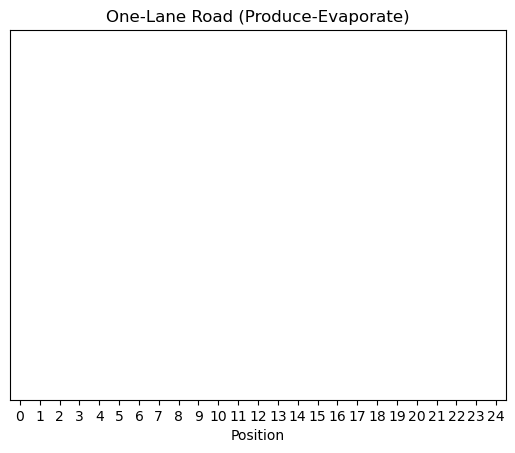

Cars:
ID: 1, Position: 0, Speed: 4, Length:9

Time step: 2


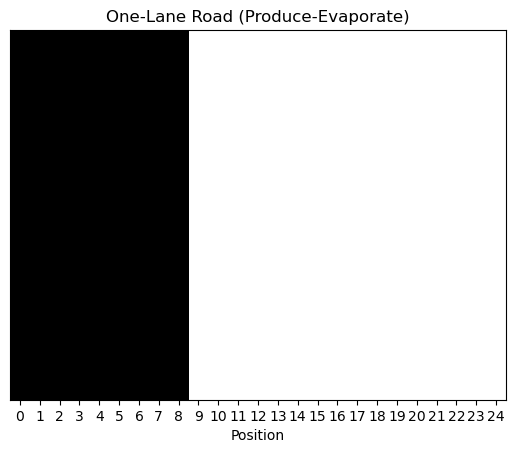

Cars:
ID: 1, Position: 5, Speed: 5, Length:9

Time step: 3


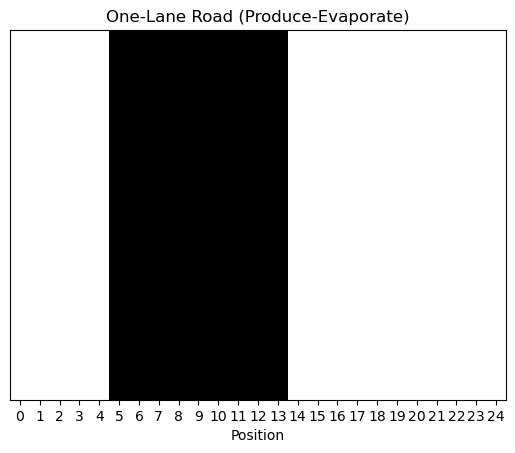

Cars:
ID: 1, Position: 10, Speed: 5, Length:9
ID: 2, Position: 0, Speed: 4, Length:9

Time step: 4


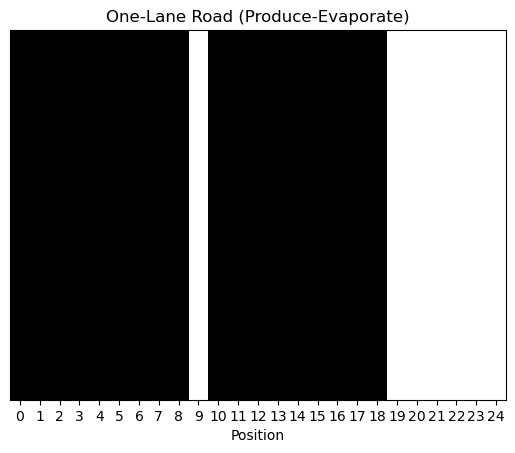

Cars:
ID: 1, Position: 15, Speed: 5, Length:9
ID: 2, Position: 5, Speed: 5, Length:9
ID: 3, Position: 0, Speed: 5, Length:2

Time step: 5


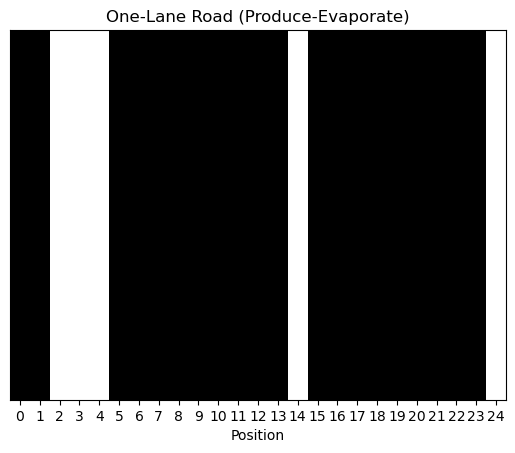

Cars:
ID: 1, Position: 20, Speed: 5, Length:9
ID: 2, Position: 10, Speed: 5, Length:9
ID: 3, Position: 5, Speed: 5, Length:2

Time step: 6


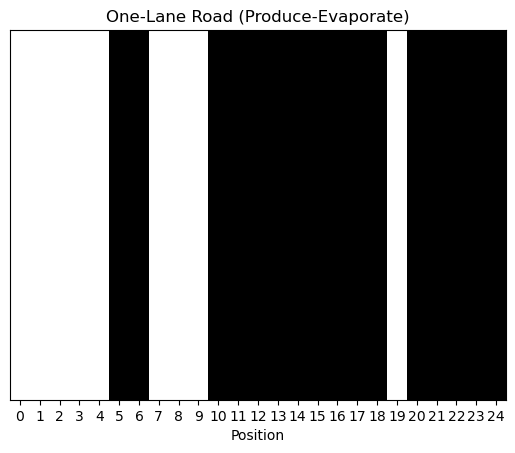

Cars:
ID: 2, Position: 15, Speed: 5, Length:9
ID: 3, Position: 10, Speed: 5, Length:2
ID: 4, Position: 0, Speed: 2, Length:9

Time step: 7


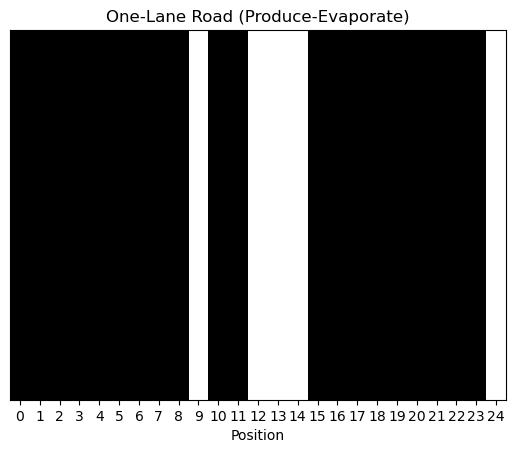

Cars:
ID: 2, Position: 20, Speed: 5, Length:9
ID: 3, Position: 15, Speed: 5, Length:2
ID: 4, Position: 3, Speed: 3, Length:9
ID: 5, Position: 0, Speed: 5, Length:9

Time step: 8


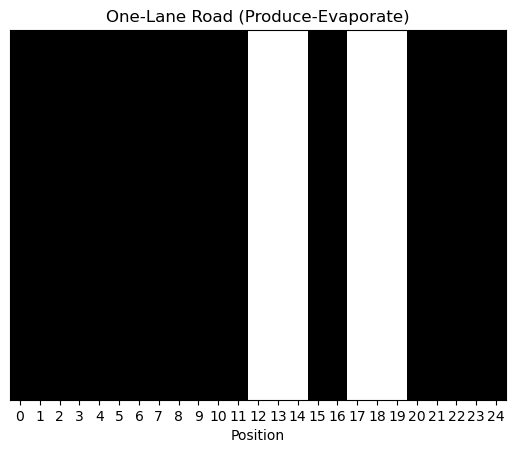

Cars:
ID: 3, Position: 19, Speed: 4, Length:2
ID: 4, Position: 7, Speed: 4, Length:9
ID: 5, Position: 5, Speed: 5, Length:9
ID: 6, Position: 0, Speed: 4, Length:2

Time step: 9


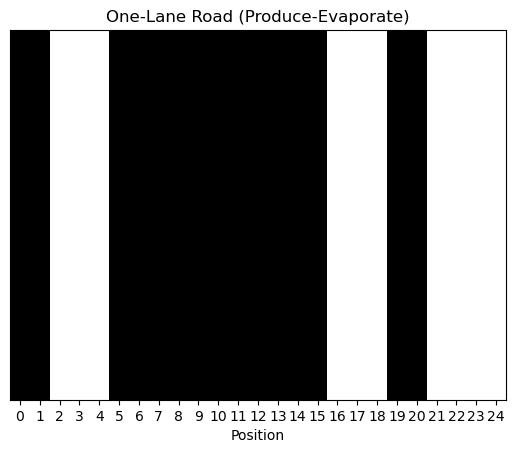

Cars:
ID: 4, Position: 12, Speed: 5, Length:9
ID: 5, Position: 10, Speed: 5, Length:9
ID: 6, Position: 5, Speed: 5, Length:2
ID: 7, Position: 0, Speed: 3, Length:5

Time step: 10


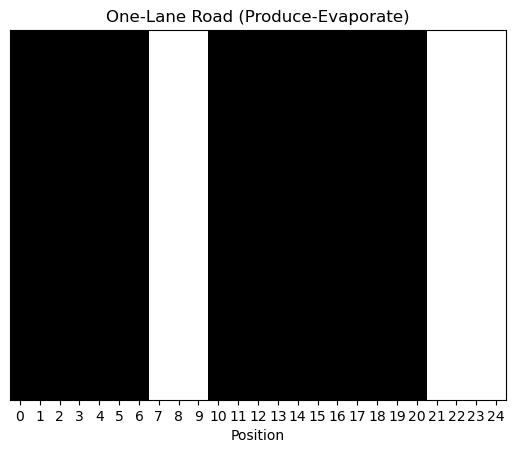

Cars:
ID: 4, Position: 17, Speed: 5, Length:9
ID: 5, Position: 15, Speed: 5, Length:9
ID: 6, Position: 10, Speed: 5, Length:2
ID: 7, Position: 4, Speed: 4, Length:5

Time step: 11


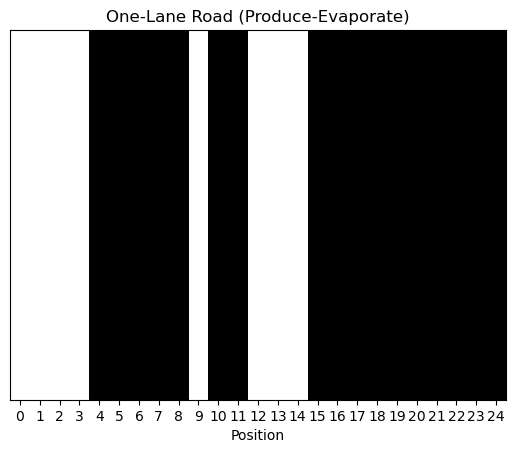

Cars:
ID: 4, Position: 22, Speed: 5, Length:9
ID: 5, Position: 20, Speed: 5, Length:9
ID: 6, Position: 15, Speed: 5, Length:2
ID: 7, Position: 9, Speed: 5, Length:5
ID: 8, Position: 0, Speed: 2, Length:1

Time step: 12


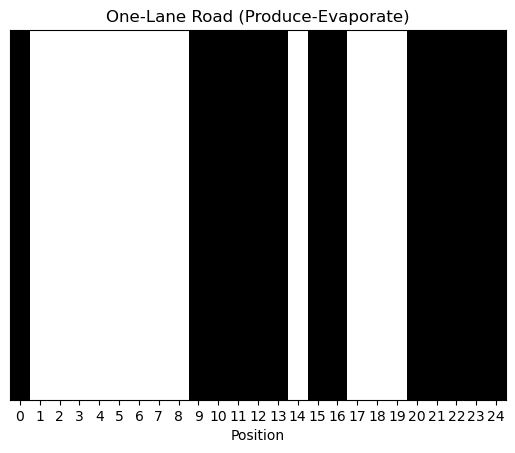

Cars:
ID: 5, Position: 21, Speed: 1, Length:9
ID: 6, Position: 20, Speed: 5, Length:2
ID: 7, Position: 14, Speed: 5, Length:5
ID: 8, Position: 3, Speed: 3, Length:1
ID: 9, Position: 0, Speed: 5, Length:2

Time step: 13


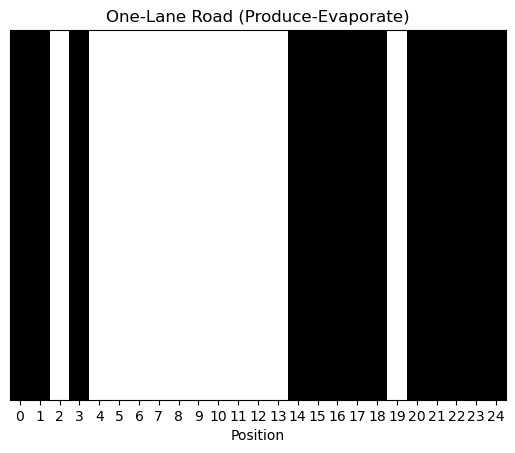

Cars:
ID: 5, Position: 23, Speed: 2, Length:9
ID: 6, Position: 22, Speed: 2, Length:2
ID: 7, Position: 19, Speed: 5, Length:5
ID: 8, Position: 7, Speed: 4, Length:1
ID: 9, Position: 5, Speed: 5, Length:2

Time step: 14


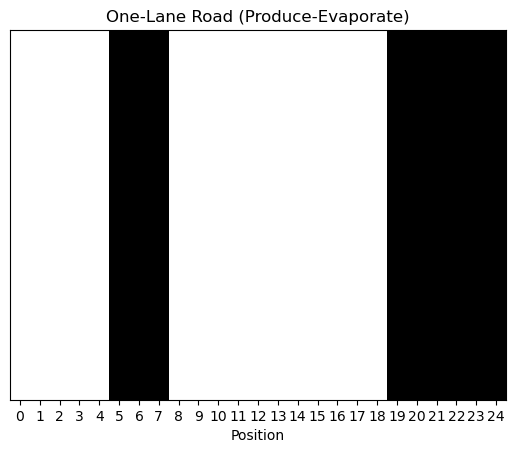

Cars:
ID: 6, Position: 22, Speed: 0, Length:2
ID: 7, Position: 21, Speed: 2, Length:5
ID: 8, Position: 12, Speed: 5, Length:1
ID: 9, Position: 10, Speed: 5, Length:2
ID: 10, Position: 0, Speed: 1, Length:2

Time step: 15


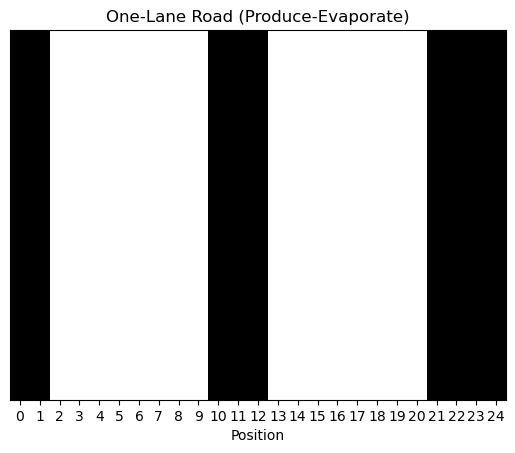

Cars:
ID: 6, Position: 23, Speed: 1, Length:2
ID: 7, Position: 22, Speed: 1, Length:5
ID: 8, Position: 17, Speed: 5, Length:1
ID: 9, Position: 15, Speed: 5, Length:2
ID: 10, Position: 2, Speed: 2, Length:2

Time step: 16


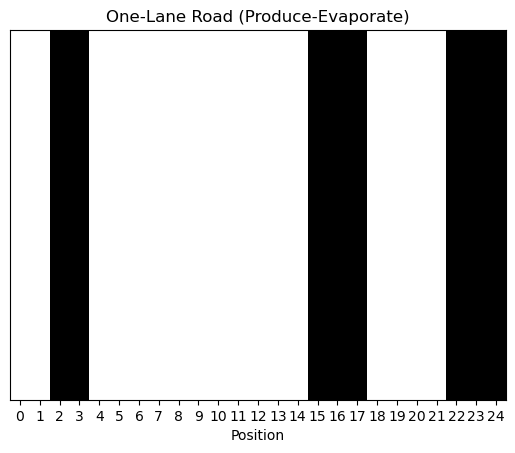

Cars:
ID: 7, Position: 22, Speed: 0, Length:5
ID: 8, Position: 21, Speed: 4, Length:1
ID: 9, Position: 20, Speed: 5, Length:2
ID: 10, Position: 5, Speed: 3, Length:2
ID: 11, Position: 0, Speed: 4, Length:5

Time step: 17


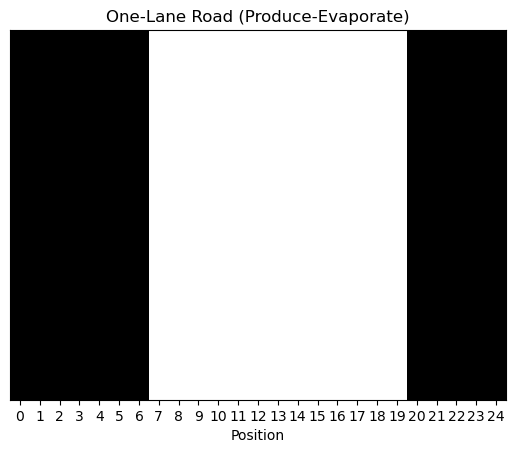

Cars:
ID: 7, Position: 23, Speed: 1, Length:5
ID: 8, Position: 22, Speed: 1, Length:1
ID: 9, Position: 21, Speed: 1, Length:2
ID: 10, Position: 9, Speed: 4, Length:2
ID: 11, Position: 5, Speed: 5, Length:5
ID: 12, Position: 0, Speed: 5, Length:9

Time step: 18


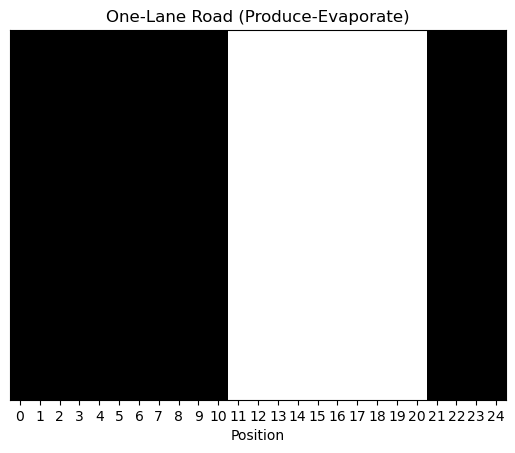

Cars:
ID: 8, Position: 22, Speed: 0, Length:1
ID: 9, Position: 21, Speed: 0, Length:2
ID: 10, Position: 14, Speed: 5, Length:2
ID: 11, Position: 10, Speed: 5, Length:5
ID: 12, Position: 5, Speed: 5, Length:9
ID: 13, Position: 0, Speed: 2, Length:5

Time step: 19


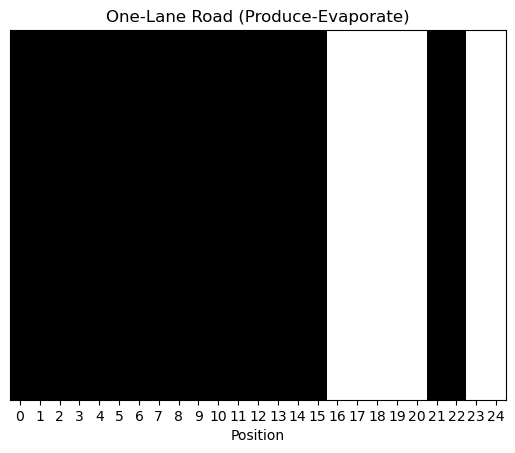

Cars:
ID: 8, Position: 23, Speed: 1, Length:1
ID: 9, Position: 22, Speed: 1, Length:2
ID: 10, Position: 19, Speed: 5, Length:2
ID: 11, Position: 15, Speed: 5, Length:5
ID: 12, Position: 10, Speed: 5, Length:9
ID: 13, Position: 3, Speed: 3, Length:5
ID: 14, Position: 0, Speed: 4, Length:2

Time step: 20


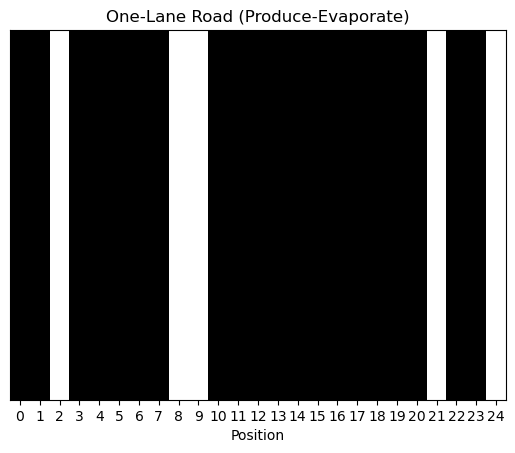

Cars:
ID: 9, Position: 22, Speed: 0, Length:2
ID: 10, Position: 21, Speed: 2, Length:2
ID: 11, Position: 20, Speed: 5, Length:5
ID: 12, Position: 15, Speed: 5, Length:9
ID: 13, Position: 7, Speed: 4, Length:5
ID: 14, Position: 5, Speed: 5, Length:2
ID: 15, Position: 0, Speed: 4, Length:2

Time step: 21


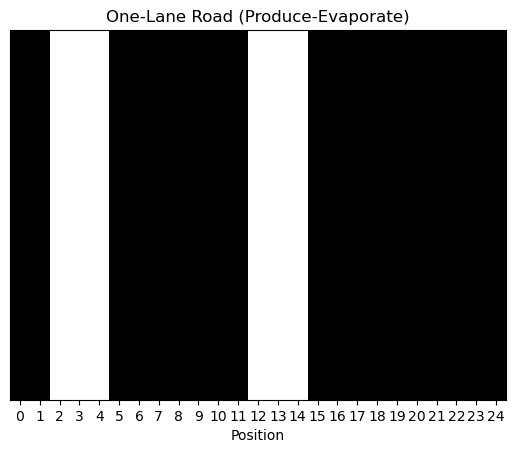

Cars:
ID: 9, Position: 23, Speed: 1, Length:2
ID: 10, Position: 22, Speed: 1, Length:2
ID: 11, Position: 21, Speed: 1, Length:5
ID: 12, Position: 20, Speed: 5, Length:9
ID: 13, Position: 12, Speed: 5, Length:5
ID: 14, Position: 10, Speed: 5, Length:2
ID: 15, Position: 5, Speed: 5, Length:2
ID: 16, Position: 0, Speed: 1, Length:1

Time step: 22


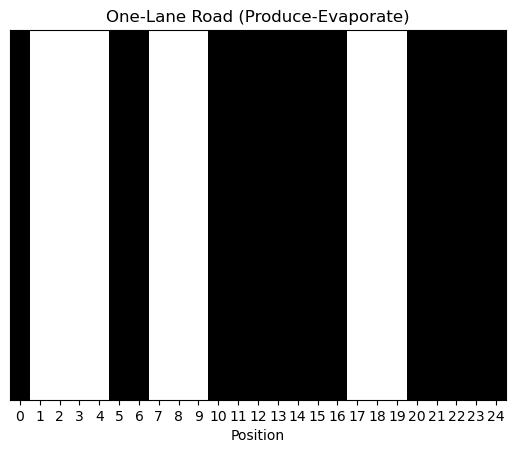

Cars:
ID: 10, Position: 22, Speed: 0, Length:2
ID: 11, Position: 21, Speed: 0, Length:5
ID: 12, Position: 20, Speed: 0, Length:9
ID: 13, Position: 17, Speed: 5, Length:5
ID: 14, Position: 15, Speed: 5, Length:2
ID: 15, Position: 10, Speed: 5, Length:2
ID: 16, Position: 2, Speed: 2, Length:1
ID: 17, Position: 0, Speed: 5, Length:1

Time step: 23


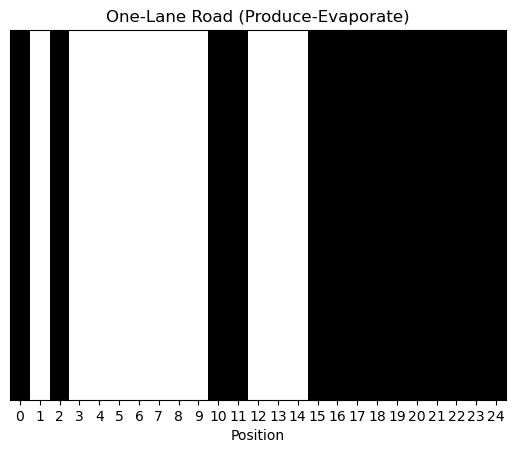

Cars:
ID: 10, Position: 23, Speed: 1, Length:2
ID: 11, Position: 22, Speed: 1, Length:5
ID: 12, Position: 21, Speed: 1, Length:9
ID: 13, Position: 20, Speed: 3, Length:5
ID: 14, Position: 19, Speed: 4, Length:2
ID: 15, Position: 15, Speed: 5, Length:2
ID: 16, Position: 5, Speed: 3, Length:1
ID: 17, Position: 4, Speed: 4, Length:1
ID: 18, Position: 0, Speed: 2, Length:1

Time step: 24


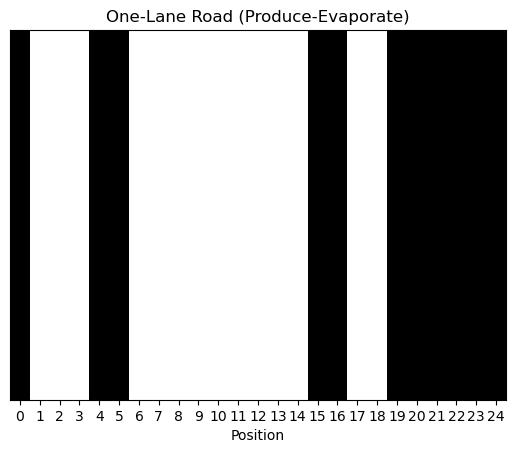

Cars:
ID: 11, Position: 22, Speed: 0, Length:5
ID: 12, Position: 21, Speed: 0, Length:9
ID: 13, Position: 20, Speed: 0, Length:5
ID: 14, Position: 19, Speed: 0, Length:2
ID: 15, Position: 18, Speed: 3, Length:2
ID: 16, Position: 9, Speed: 4, Length:1
ID: 17, Position: 8, Speed: 4, Length:1
ID: 18, Position: 3, Speed: 3, Length:1
ID: 19, Position: 0, Speed: 1, Length:1

Time step: 25


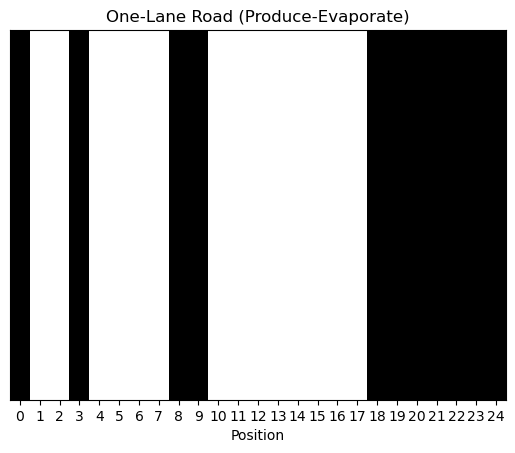

Cars:
ID: 11, Position: 23, Speed: 1, Length:5
ID: 12, Position: 22, Speed: 1, Length:9
ID: 13, Position: 21, Speed: 1, Length:5
ID: 14, Position: 20, Speed: 1, Length:2
ID: 15, Position: 19, Speed: 1, Length:2
ID: 16, Position: 14, Speed: 5, Length:1
ID: 17, Position: 13, Speed: 5, Length:1
ID: 18, Position: 7, Speed: 4, Length:1
ID: 19, Position: 2, Speed: 2, Length:1
ID: 20, Position: 0, Speed: 2, Length:1

Time step: 26


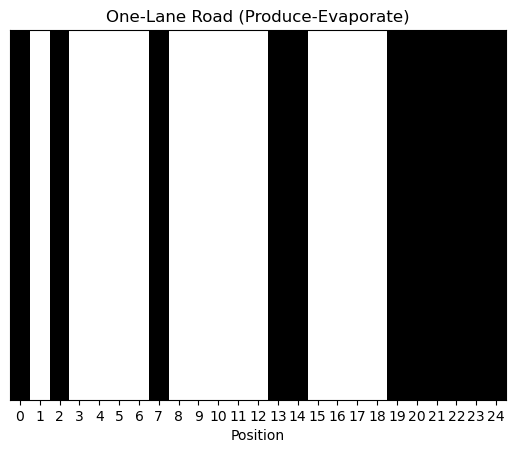

Cars:
ID: 12, Position: 22, Speed: 0, Length:9
ID: 13, Position: 21, Speed: 0, Length:5
ID: 14, Position: 20, Speed: 0, Length:2
ID: 15, Position: 19, Speed: 0, Length:2
ID: 16, Position: 18, Speed: 4, Length:1
ID: 17, Position: 17, Speed: 4, Length:1
ID: 18, Position: 12, Speed: 5, Length:1
ID: 19, Position: 5, Speed: 3, Length:1
ID: 20, Position: 3, Speed: 3, Length:1
ID: 21, Position: 0, Speed: 2, Length:1

Time step: 27


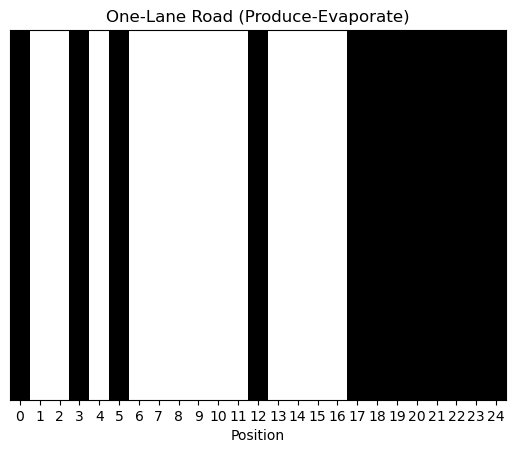

Cars:
ID: 12, Position: 23, Speed: 1, Length:9
ID: 13, Position: 22, Speed: 1, Length:5
ID: 14, Position: 21, Speed: 1, Length:2
ID: 15, Position: 20, Speed: 1, Length:2
ID: 16, Position: 19, Speed: 1, Length:1
ID: 17, Position: 18, Speed: 1, Length:1
ID: 18, Position: 17, Speed: 5, Length:1
ID: 19, Position: 9, Speed: 4, Length:1
ID: 20, Position: 7, Speed: 4, Length:1
ID: 21, Position: 3, Speed: 3, Length:1
ID: 22, Position: 0, Speed: 2, Length:5

Time step: 28


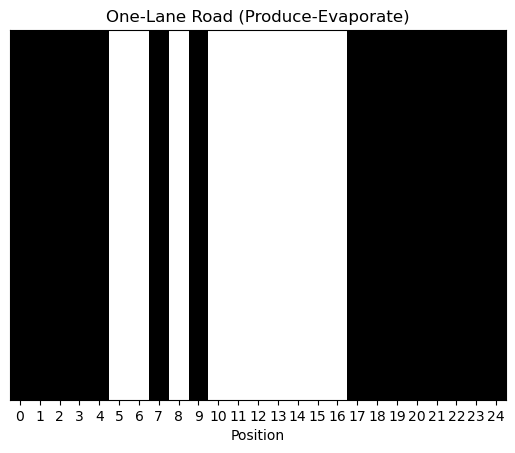

Cars:
ID: 13, Position: 22, Speed: 0, Length:5
ID: 14, Position: 21, Speed: 0, Length:2
ID: 15, Position: 20, Speed: 0, Length:2
ID: 16, Position: 19, Speed: 0, Length:1
ID: 17, Position: 18, Speed: 0, Length:1
ID: 18, Position: 17, Speed: 0, Length:1
ID: 19, Position: 14, Speed: 5, Length:1
ID: 20, Position: 12, Speed: 5, Length:1
ID: 21, Position: 7, Speed: 4, Length:1
ID: 22, Position: 3, Speed: 3, Length:5
ID: 23, Position: 0, Speed: 3, Length:1

Time step: 29


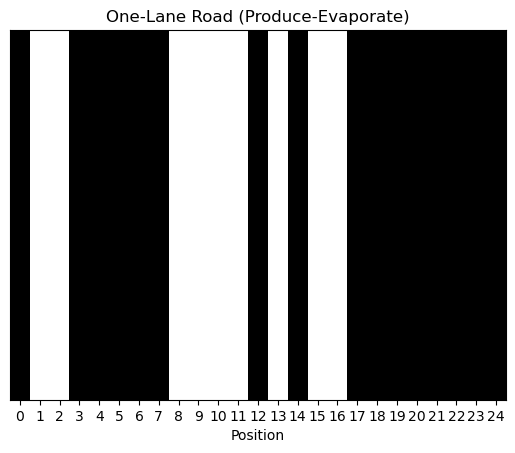

Cars:
ID: 13, Position: 23, Speed: 1, Length:5
ID: 14, Position: 22, Speed: 1, Length:2
ID: 15, Position: 21, Speed: 1, Length:2
ID: 16, Position: 20, Speed: 1, Length:1
ID: 17, Position: 19, Speed: 1, Length:1
ID: 18, Position: 18, Speed: 1, Length:1
ID: 19, Position: 17, Speed: 3, Length:1
ID: 20, Position: 16, Speed: 4, Length:1
ID: 21, Position: 12, Speed: 5, Length:1
ID: 22, Position: 7, Speed: 4, Length:5
ID: 23, Position: 4, Speed: 4, Length:1
ID: 24, Position: 0, Speed: 2, Length:2

Time step: 30


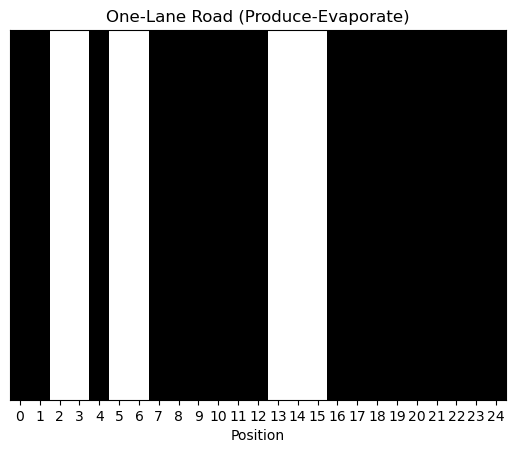

Cars:
ID: 14, Position: 22, Speed: 0, Length:2
ID: 15, Position: 21, Speed: 0, Length:2
ID: 16, Position: 20, Speed: 0, Length:1
ID: 17, Position: 19, Speed: 0, Length:1
ID: 18, Position: 18, Speed: 0, Length:1
ID: 19, Position: 17, Speed: 0, Length:1
ID: 20, Position: 16, Speed: 0, Length:1
ID: 21, Position: 15, Speed: 3, Length:1
ID: 22, Position: 12, Speed: 5, Length:5
ID: 23, Position: 9, Speed: 5, Length:1
ID: 24, Position: 3, Speed: 3, Length:2
ID: 25, Position: 0, Speed: 4, Length:9



In [15]:
#Iterate over N timesteps
N=30
for i in range(N):
    print("Time step:", i+1)
    road.visualize()
    road.update()

    #Access information of each vehicle
    print("Cars:")
    for car in road.cars:
        print(f"ID: {car.car_id}, Position: {car.position}, Speed: {car.speed}, Length:{car.length}")

    print()